In [ ]:
# Biar gaperlu import file ke colab cara nya pake gdwon
import pandas as pd
import numpy as np

import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

import gdown

# **Data Understanding**

## **Load Data**

In [ ]:
# load data
url = 'https://drive.google.com/uc?id=10Gf-0hgHxj9Fm8ejqrPMQ316VFnQidpf' # masukan id drive file nya-- ini id drive dari gua aja
output = 'Data Iklim_Final Project.zip'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=10Gf-0hgHxj9Fm8ejqrPMQ316VFnQidpf
To: /content/Data Iklim_Final Project.zip
100%|██████████| 7.17M/7.17M [00:00<00:00, 12.1MB/s]


'Data Iklim_Final Project.zip'

In [ ]:
# Extract file karna sebelumnya file nya zip
import zipfile,os
local_zip = '/content/Data Iklim_Final Project.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
climate_data = pd.read_csv('/content/Data Iklim_Final Project/climate_data.csv')
station_detail = pd.read_csv('/content/Data Iklim_Final Project/station_detail.csv')
province_detail = pd.read_csv('/content/Data Iklim_Final Project/province_detail.csv')

## **Data Dictionary**

**Data yang akan dianalisis lebih banyak dilakukan di climate_data sedangkan dataset yang lain sebagai pendukung untuk keperluan EDA**

In [ ]:
dict_data = pd.read_excel('/content/Data Iklim_Final Project/data_dict.xlsx')
dict_data

,feature,deskripsi
0,Tn,min temperature (°C)
1,Tx,max temperature (°C)
2,Tavg,avg temperature (°C)
3,RH_avg,avg humidity (%)
4,RR,rainfall (mm)
5,ss,duration of sunshine (hour)
6,ff_x,max wind speed (m/s)
7,ddd_x,wind direction at maximum speed (°)
8,ff_avg,avg wind speed (m/s)
9,ddd_car,most wind direction (°)


In [ ]:
#Rename Kolom agar mudah dipahami
climate_data = climate_data.rename(columns={
    'date' : 'Date',
    'Tn': 'MinTemp',
    'Tx': 'MaxTemp',
    'Tavg': 'AvgTemp',
    'RH_avg': 'AvgHum',
    'RR': 'RainFall',
    'ss': 'DurationSunshine',
    'ff_x': 'MaxWindSpeed',
    'ddd_x': 'WindDirectionMaxSpeed' ,
    'ff_avg': 'AvgWindSpeed',
    'ddd_car': 'MostWindDirection'
})

In [ ]:
# Membuat kolom baru untuk date_day, date_month, day_year agar terpisah untuk kepentingan EDA nanti
date_list=['date_day','date_month','date_year']
x=0
for i in date_list:
    climate_data[i] = climate_data['Date'].str.split('-').str[x]
    climate_data[i] = pd.to_numeric(climate_data[i], downcast="float")
    x+=1

In [ ]:
#Mengubah tipe data Date seutuhnya ke DataTime
climate_data.Date = pd.to_datetime(climate_data.Date)
climate_data.Date = climate_data.Date.dt.strftime('%d/%m/%Y')

<ipython-input-9-0020b8ca08f9>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  climate_data.Date = pd.to_datetime(climate_data.Date)


## **Data Info, Descriptive, Missing Value**




In [ ]:
climate_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   589265 non-null  object 
 1   MinTemp                565882 non-null  float64
 2   MaxTemp                551529 non-null  float64
 3   AvgTemp                544160 non-null  float64
 4   AvgHum                 541083 non-null  float64
 5   RainFall               463881 non-null  float64
 6   DurationSunshine       545544 non-null  float64
 7   MaxWindSpeed           579051 non-null  float64
 8   WindDirectionMaxSpeed  576137 non-null  float64
 9   AvgWindSpeed           579138 non-null  float64
 10  MostWindDirection      575526 non-null  object 
 11  station_id             589265 non-null  int64  
 12  date_day               589265 non-null  float32
 13  date_month             589265 non-null  float32
 14  date_year              589265 non-nu

In [ ]:
# Kategorikal Kolom Describe
climate_data['MostWindDirection'].describe().T

count     575526
unique         9
top           N 
freq      196415
Name: MostWindDirection, dtype: object

In [ ]:
# Numerical kolom Describe
climate_data.describe()

,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,station_id,date_day,date_month,date_year
count,565882.000000,551529.000000,544160.000000,541083.000000,463881.000000,545544.000000,579051.000000,576137.000000,579138.000000,589265.000000,589265.000000,589265.000000,589265.000000
mean,23.312111,31.528955,26.855475,82.489365,8.680760,5.083199,4.709601,188.488325,1.956680,96832.949230,15.677870,6.541958,2015.104614
std,2.280687,2.311659,1.939656,14.337669,17.928752,3.261586,2.612285,107.657452,1.803358,542.419161,8.809409,3.464439,3.223732
min,0.000000,0.000000,0.000000,24.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,96001.000000,1.000000,1.000000,2010.000000
25%,23.000000,30.500000,26.200000,79.000000,0.000000,2.500000,3.000000,90.000000,1.000000,96293.000000,8.000000,4.000000,2012.000000
50%,24.000000,31.800000,27.200000,83.000000,1.000000,5.300000,4.000000,180.000000,2.000000,96797.000000,16.000000,7.000000,2015.000000
75%,25.000000,33.000000,28.000000,87.000000,9.300000,7.600000,6.000000,270.000000,3.000000,97240.000000,23.000000,10.000000,2018.000000
max,246.000000,334.000000,141.600000,7520.000000,1965.500000,705.000000,185.000000,931.000000,160.000000,97980.000000,31.000000,12.000000,2020.000000


1. Ada beberapa Outlier yang ambigu, pada data **numeric**

**Temparatur** mulai dari MinTemp, MaxTemp dan AvgTemp yang suhu nya tidak masuk akal **lebih dari 40°** , dimana 40° menjadi angka maksimum suhu di Indonesia Menurut BMKG

**Curah hujan**, menurut BMKG Curah hujan harian di Indonesia sekitar **400 mm** saja sedangkan diatasnya adalah hal yang mustahil dalam harian

**AvgHum**, Kelembapan di sini meruapakan rata-rata dalam bentuk persen. Dan menurut BMKG di Indonesia hanya memiliki rata-rata kelembapan (%) **tidak lebih dari 99%**

**DurationSunshine**, Secara naluri manusia matahari dari terbit dan tenggelam di Indonesia biasa hanya berlangsung **12-13 jam saja**. Dan hal yang mustahil jika lebih dari 12-13 jam

**MaxWindDirection**, (WindDirectionMaxSpeed) menurut BMKG Indonesia Arah Mata angin hanya tersedia dari **0° - 360°**

**Kecepatan Angin**, (MaxWindSpeed dan AvgWindSpeed) menurut pantauan BMKG Indonesia memiliki kurang lebih **18 m/s** kecepatan angin atau setara 35 Knots. Kemungkinan lebih dari 18 m/s adalah pantauan kecepatan angin di Samudra.


2.  **Categorical**, Setidaknya ada 9 arah mata angin yang dikategorikan berdasarkan derajat arah mata angin (BMKG)



In [ ]:
# Checking Missing Values
climate_data.isna().mean().sort_values(ascending=False)

RainFall                 0.212780
AvgHum                   0.081766
AvgTemp                  0.076545
DurationSunshine         0.074196
MaxTemp                  0.064039
MinTemp                  0.039682
MostWindDirection        0.023315
WindDirectionMaxSpeed    0.022279
MaxWindSpeed             0.017333
AvgWindSpeed             0.017186
Date                     0.000000
station_id               0.000000
date_day                 0.000000
date_month               0.000000
date_year                0.000000
dtype: float64

In [ ]:
# Combine data for EDA
climate_merge = pd.merge(climate_data, station_detail, on='station_id')

# Gabungan data climate ke stasiun dan province berdasarkan id nya
climate_merge = pd.merge(climate_merge, province_detail, left_on='province_id', right_on='province_id')
climate_merge

,Date,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,...,date_day,date_month,date_year,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01/01/2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,...,1.0,1.0,2010.0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,01/02/2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,...,2.0,1.0,2010.0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,01/03/2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,...,3.0,1.0,2010.0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,01/04/2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,...,4.0,1.0,2010.0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,01/05/2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,...,5.0,1.0,2010.0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27/12/2020,25.2,31.8,28.1,85.0,0.0,8.2,4.0,320.0,2.0,...,27.0,12.0,2020.0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589261,28/12/2020,26.0,32.0,28.3,86.0,0.0,1.7,4.0,270.0,1.0,...,28.0,12.0,2020.0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589262,29/12/2020,25.7,31.0,27.5,88.0,20.0,4.6,6.0,310.0,2.0,...,29.0,12.0,2020.0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
589263,30/12/2020,26.0,33.0,29.2,80.0,12.8,2.4,5.0,250.0,2.0,...,30.0,12.0,2020.0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku


## **Exploratory Data Analysis**

### Stasiun Terbanyak berdasarkan provinsi

In [ ]:
# Stasiun Terbanyak berdasarkan provinsi
df3 = climate_merge.groupby('province_name',)['station_name'].nunique()
df3 = df3.sort_values(ascending=False)
df3= df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Stasiun Terbanyak berdasarkan provinsi',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Stasiun',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} Stasiun', textposition='outside')
fig.update_layout(title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=22, title_x=0.5)
fig.show()


### Stasiun yang paling banyak melakukan pengamatan

In [ ]:
# Stasiun Terbanyak berdasarkan provinsi
df3 = climate_merge.groupby('station_name',)['station_id'].count()
df3 = df3.sort_values(ascending=False)
df3= df3.head(5)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Stasiun Pengamatan Terbanyak berdasarkan provinsi',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Pengamatan',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} Pengamatan', textposition='outside')
fig.update_layout(title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=22, title_x=0.5)
fig.show()

### Rata-rata Curah Hujan (RainFall) di Indonesia

In [ ]:
climate_rain = climate_merge[['RainFall','date_day','date_month','date_year']]

In [ ]:
df_mount = climate_rain.groupby('date_month', as_index=False)['RainFall'].mean()
df_mount['date_month'] = [calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df_mount['date_month']]

fig = make_subplots(rows=1, cols=2, subplot_titles=['Monthly Average Rainfall', 'Yearly Average Rainfall'])

fig.add_trace(go.Scatter(
    x=df_mount['date_month'], y=df_mount['RainFall'],
    mode='lines+markers', line=dict(color='#0c2054', width=2),
    marker=dict(color='#0c2054', size=8), name='Monthly'
), row=1, col=1)

fig.update_layout(
    title='Monthly Average Rainfall (Line Chart)',
    xaxis=dict(title='Month'), yaxis=dict(title='Rainfall (mm)'),
    height=800, width=1100
)

df_y = climate_rain.groupby('date_year', as_index=False)['RainFall'].mean()
fig.add_trace(go.Scatter(
    x=df_y['date_year'], y=df_y['RainFall'],
    mode='lines+markers', line=dict(color='#0c2054', width=2),
    marker=dict(color='#0c2054', size=8), name='Yearly'
), row=1, col=2)

fig.update_layout(
    title='Rata-rata Curah Hujan di Indonesia',
    xaxis=dict(title='Year'), yaxis=dict(title='Rainfall (mm)'),
    height=800, width=1100
)
fig.update_layout(height=500, width=1000, title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=22, title_x=0.5)

fig.show()


### Suhu Rata-rata (AvgTemp) Tahunan setiap Provinsi

In [ ]:
df_r = climate_merge.groupby(['date_year', 'province_name'], as_index=False)[['RainFall', 'DurationSunshine', 'AvgTemp']].mean()
fig = go.Figure()

for province in df_r['province_name'].unique():
    province_data = df_r[df_r['province_name'] == province]
    fig.add_trace(go.Scatter(
        x=province_data['date_year'],
        y=province_data['AvgTemp'],
        mode='lines+markers',
        name=province,
        line=dict(width=2),
        marker=dict(size=5),
    ))

fig.update_layout(
    title='Suhu Rata-rata Tahunan setiap Provinsi',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Temperature (Tavg)'),
    height=800,
    width=1100,
    legend=dict(x=1.02, y=1, bordercolor='rgba(255, 255, 255, 0)'),
)
fig.update_layout(height=500, width=1000, title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=22, title_x=0.5)

fig.show()


### Persebaran Heatmap AvgTemp dari tahun 2010-2020

<ipython-input-19-28de587935dd>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



Text(0.5, 1.0, 'Persebaran Heatmap AvgTemp dari tahun 2010-2020')

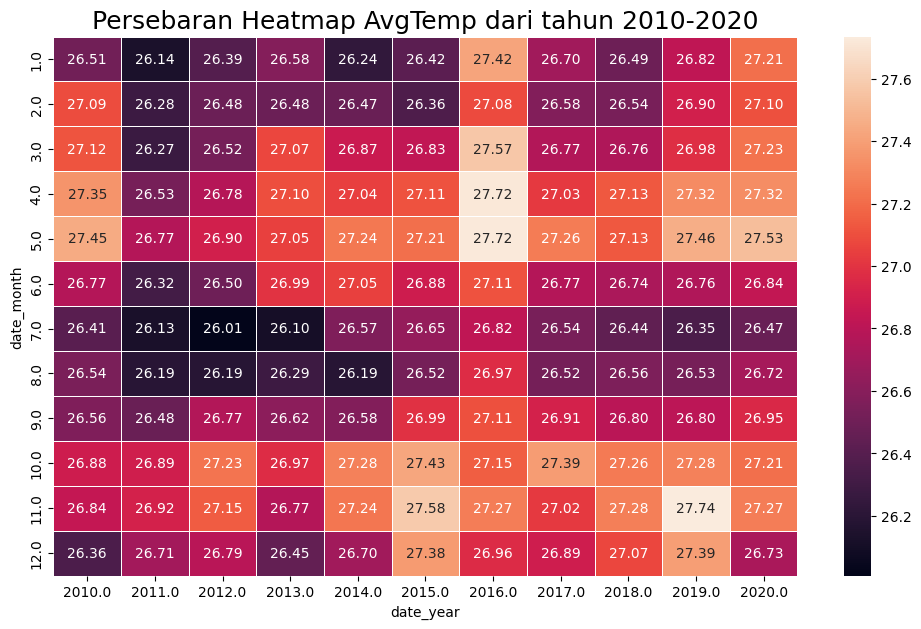

In [ ]:
df_rx = climate_merge.groupby(['date_year','date_month'],as_index=False)[['AvgTemp']].mean()
temp_matrix = df_rx.pivot("date_month", "date_year", "AvgTemp")
fig = plt.figure(figsize=(12,7))
r = sns.heatmap(temp_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=.5)
r.set_title("Persebaran Heatmap AvgTemp dari tahun 2010-2020" ,fontsize=18)

### Rata-rata Lama Sinar Matahari (DurationSunshine) Bulanan di Indonesia


In [ ]:
# DataFrame df_ss
df_ss = climate_merge.groupby('date_month', as_index=False)['DurationSunshine'].mean()
df_ss['date_month'] = [calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df_ss['date_month']]

# Plotly Figure
fig = go.Figure()

# Tambahkan trace line
fig.add_trace(go.Scatter(
    x=df_ss['date_month'],
    y=df_ss['DurationSunshine'],
    mode='lines+markers',
    line=dict(color='#0c2054', width=3),
    marker=dict(color='#0c2054', size=9),
))

# Layout figure
fig.update_layout(
    title='Rata-rata Lama Sinar Matahari Bulanan di Indonesia',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Sunshine (hour)'),
    height=500,
    width=800,
)
fig.update_layout(title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=22, title_x=0.5)
# Tampilkan figure
fig.show()

### Distribusi Kecepatan Angin (MaxWindSpeed) berdasarkan kebanyakan Arah Mata Angin (MostWindDirection)

In [ ]:
def box_plot(x ,xlabel, title):
    plt.figure(figsize=(25, 8))
    sns.boxplot(data= climate_merge, x= x, y='MostWindDirection', palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, size=18)
    plt.ylabel("Most wind direction (°)", size=18)
    sns.despine(left=True)

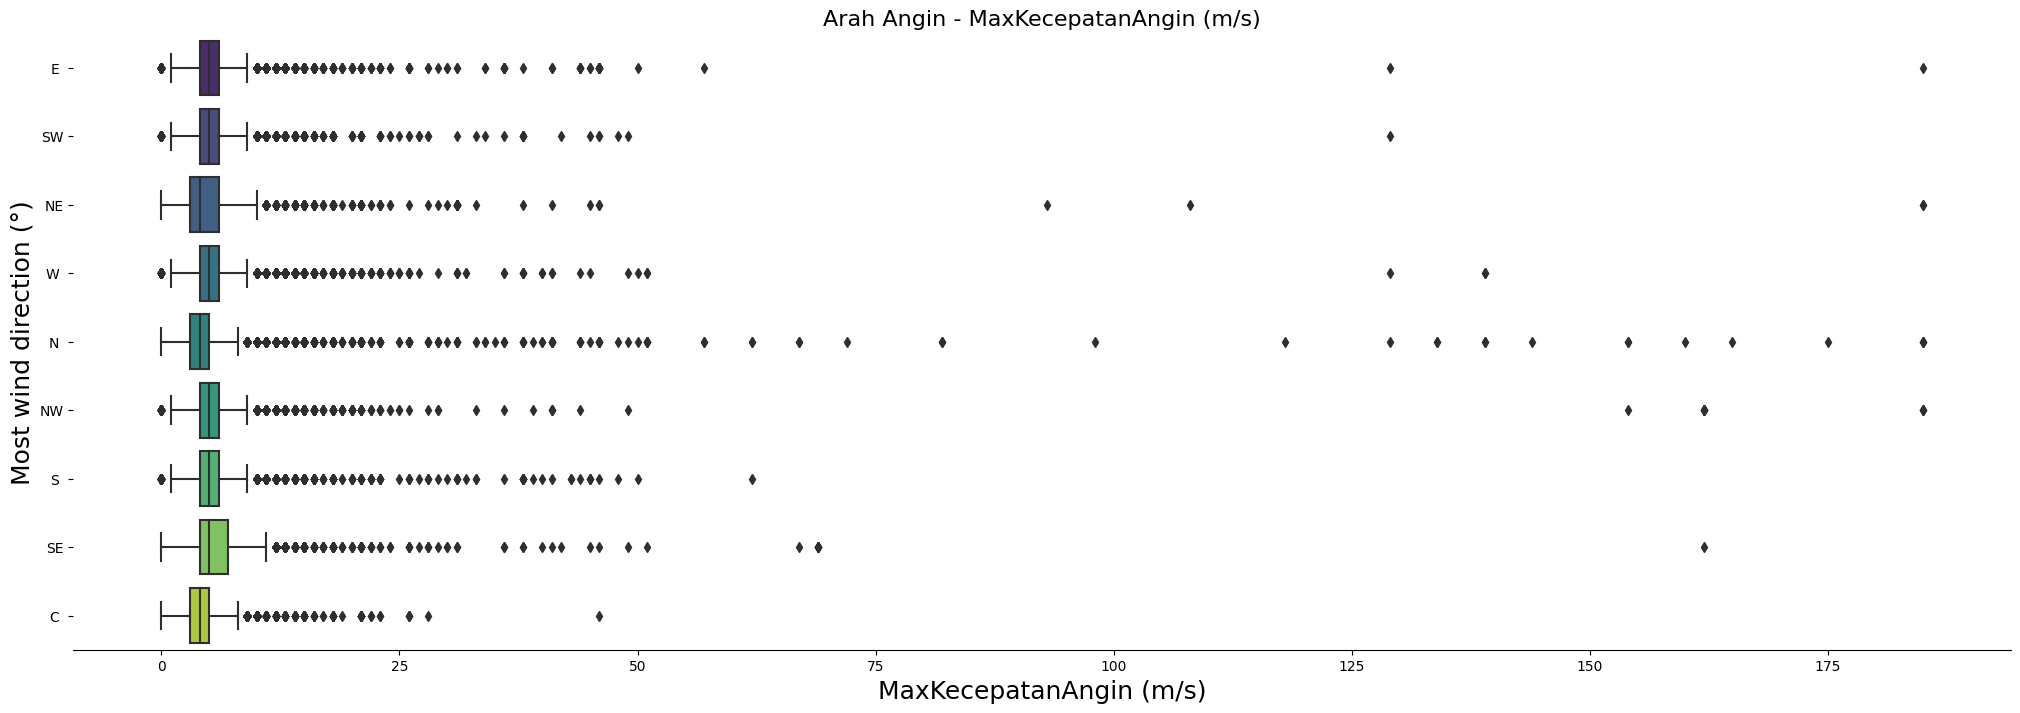

In [ ]:
box_plot('MaxWindSpeed', "MaxKecepatanAngin (m/s)", 'Arah Angin - MaxKecepatanAngin (m/s)' )

## **Correlation**

In [ ]:
korelasi = climate_data.drop(['station_id', 'date_year'], axis=1).corr()

<ipython-input-23-bf3b2f4490a0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Memberikan batas-batas nilai
vmin, vmax = 0.1, 0.99

unstack_corr = korelasi.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [ ]:
# Buat mask untuk mempersingkat keterbacaan korelasi
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

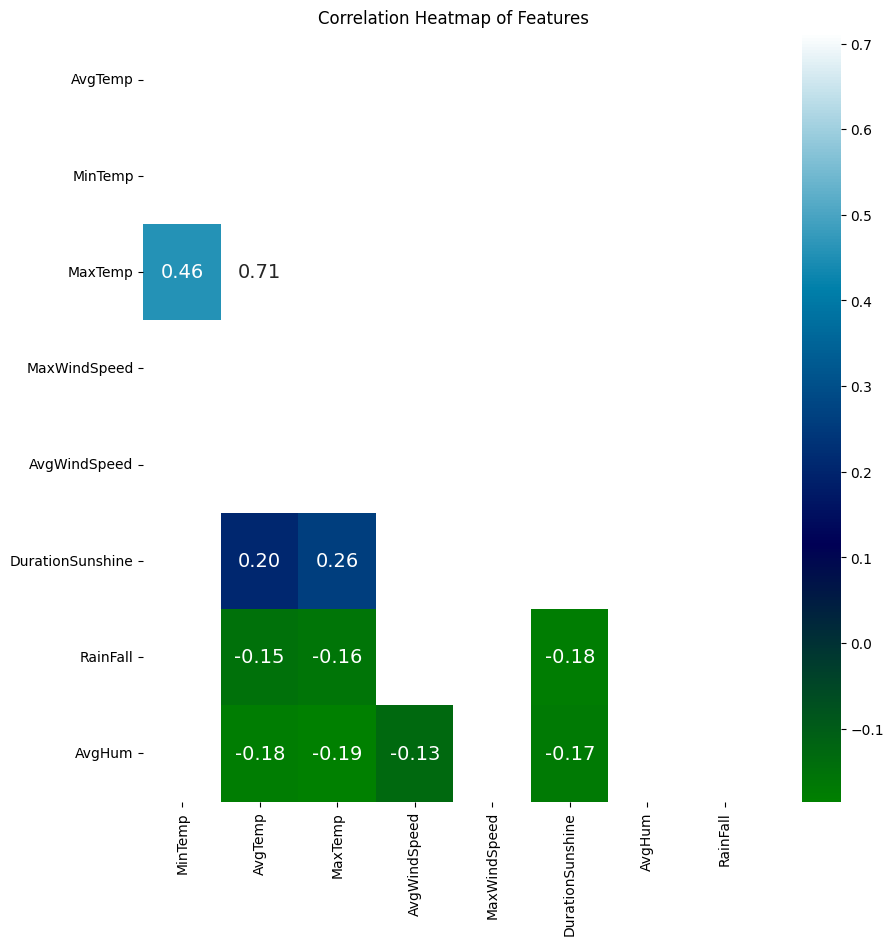

In [ ]:
# Buat heatmap
plt.figure(figsize=(10, 10))
plot = sns.heatmap(
    trimmed_corr,
    annot=True,
    mask=mask,
    fmt=".2f",
    cmap="ocean",
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=10)
plot.set_yticklabels(plot.get_yticklabels(), size=10)
plt.title("Correlation Heatmap of Features")
plt.show()

# **Data Preparation**

## Checking Data Quality

**whis** (whisker length) --> **Threshold** digunakan untuk menentukan panjang whisker (garis yang menghubungkan kotak dengan titik ekstrim di atas dan di bawahnya) sebagai faktor dari IQR (Interquartile Range). misal whis= 5 berarti 5x nya IQR

In [ ]:
## Checking Outlier
def outlier_thresholds(df, col, whis=2):
    """ Function to calculate upper and lower bounds for outliers """
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    lower_bound = q25 - whis * iqr
    upper_bound = q75 + whis * iqr
    print(f'Lower Limit for {col}: {lower_bound}')
    print(f'Upper Limit for {col}: {upper_bound}')
    return lower_bound, upper_bound

def cnt_outliers(df, cols_pred, plot=False, whis_dict=None, replace_strategy='mean'):
    """ Function to estimate and plot the number of outlier cases """
    col_names = []

    if whis_dict is None:
        whis_dict = {col: 2 for col in cols_pred}

    for col in cols_pred:
        whis = whis_dict.get(col, 2)
        low_lim, up_lim = outlier_thresholds(df, col, whis=whis)
        outliers = df[(df[col] > up_lim) | (df[col] < low_lim)]
        if outliers.any(axis=None):
            number_of_outliers = outliers.shape[0]
            print(col, "'s outliers count:", number_of_outliers)
            col_names.append(col)

            if plot:
                sns.boxplot(x=df[col], whis=whis)
                plt.show()

    return col_names

Lower Limit for MinTemp: 13.0
Upper Limit for MinTemp: 35.0
MinTemp 's outliers count: 1053


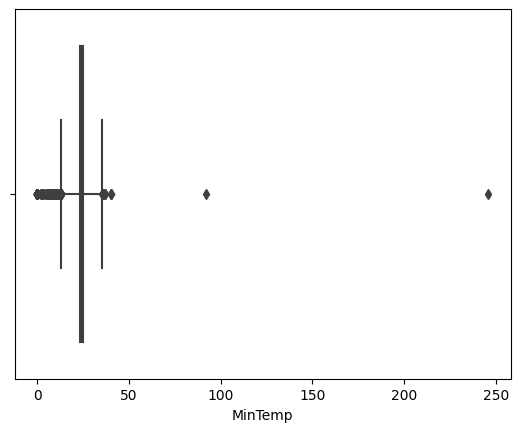

Lower Limit for MaxTemp: 23.0
Upper Limit for MaxTemp: 40.5
MaxTemp 's outliers count: 1097


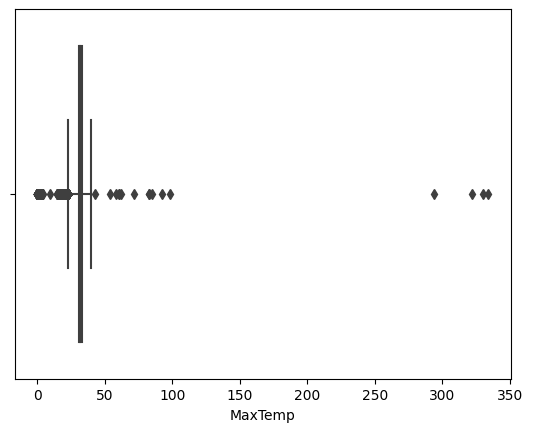

Lower Limit for AvgTemp: 19.9
Upper Limit for AvgTemp: 34.300000000000004
AvgTemp 's outliers count: 5963


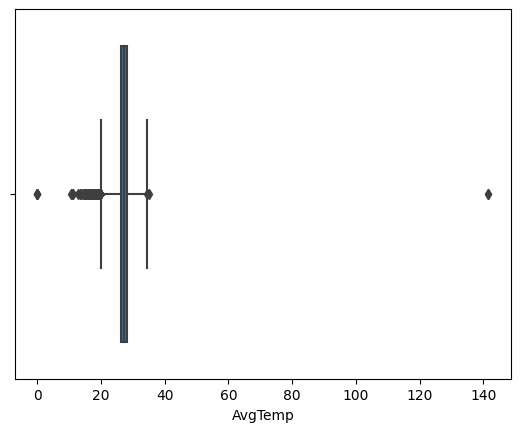

Lower Limit for AvgHum: 67.0
Upper Limit for AvgHum: 99.0
AvgHum 's outliers count: 12462


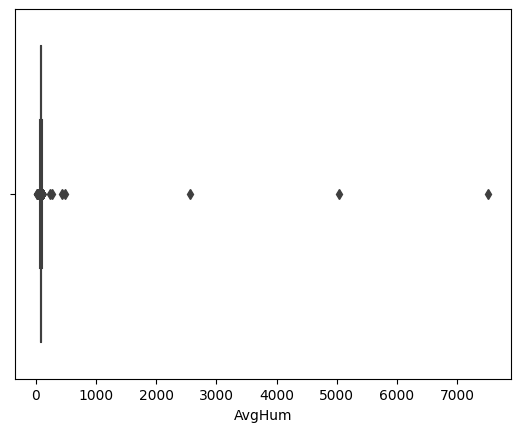

Lower Limit for RainFall: -604.5
Upper Limit for RainFall: 613.8
RainFall 's outliers count: 4


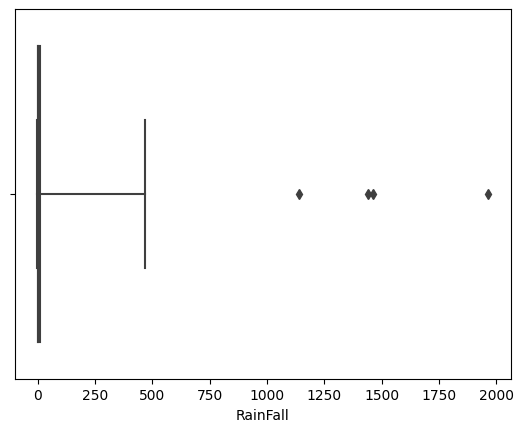

Lower Limit for DurationSunshine: -2.5999999999999996
Upper Limit for DurationSunshine: 12.7
DurationSunshine 's outliers count: 149


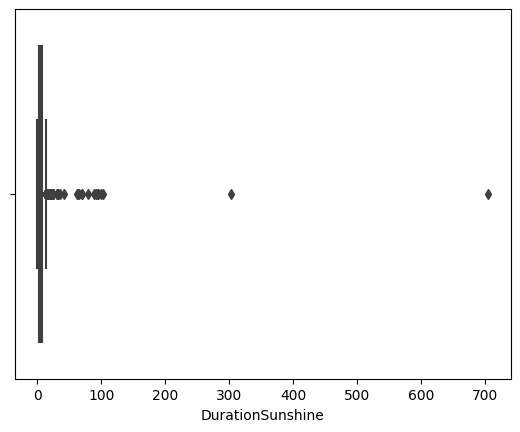

Lower Limit for MaxWindSpeed: -9.0
Upper Limit for MaxWindSpeed: 18.0
MaxWindSpeed 's outliers count: 713


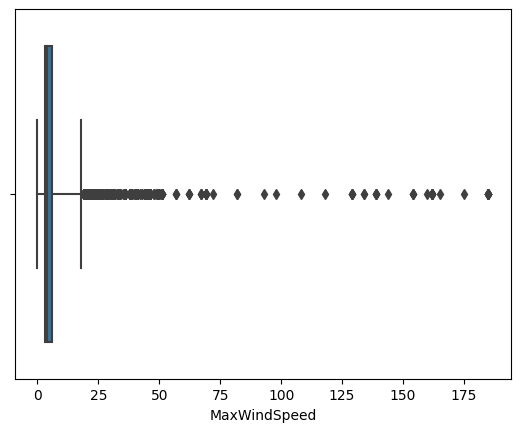

Lower Limit for WindDirectionMaxSpeed: 0.0
Upper Limit for WindDirectionMaxSpeed: 360.0
WindDirectionMaxSpeed 's outliers count: 541


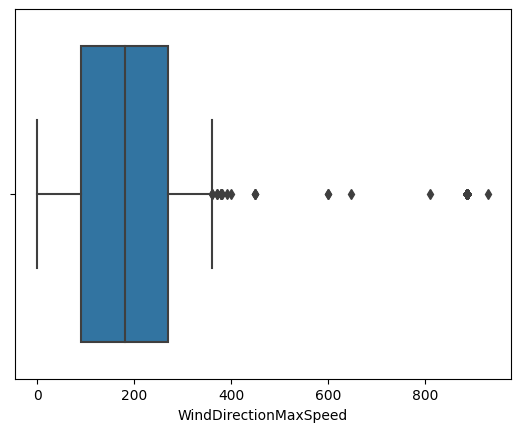

Lower Limit for AvgWindSpeed: -3.0
Upper Limit for AvgWindSpeed: 7.0
AvgWindSpeed 's outliers count: 1722


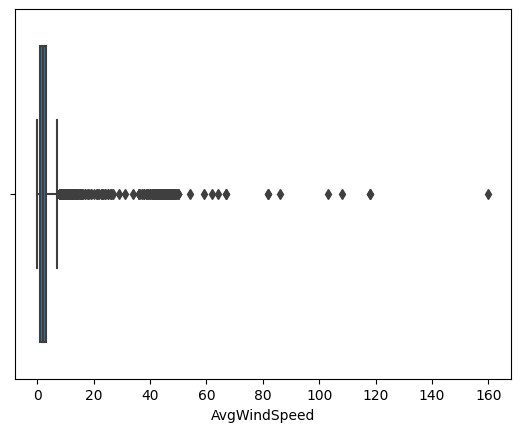

Lower Limit for station_id: 94399.0
Upper Limit for station_id: 99134.0
Lower Limit for date_day: -22.0
Upper Limit for date_day: 53.0
Lower Limit for date_month: -8.0
Upper Limit for date_month: 22.0
Lower Limit for date_year: 2000.0
Upper Limit for date_year: 2030.0


In [ ]:
cols_num = climate_data.select_dtypes(include=['int','float'])
whis_dict = {'DurationSunshine': 1, 'MinTemp': 5, 'MaxTemp': 3, 'AvgTemp': 3.5,'RainFall': 65,'MaxWindSpeed': 4,'AvgHum': 1.5, 'WindDirectionMaxSpeed': 0.5 }
outlier_cols = cnt_outliers(climate_data, cols_num, plot=True, whis_dict=whis_dict)

In [ ]:
## Checking Missing Value
climate_data.isnull().mean()

Date                     0.000000
MinTemp                  0.039682
MaxTemp                  0.064039
AvgTemp                  0.076545
AvgHum                   0.081766
RainFall                 0.212780
DurationSunshine         0.074196
MaxWindSpeed             0.017333
WindDirectionMaxSpeed    0.022279
AvgWindSpeed             0.017186
MostWindDirection        0.023315
station_id               0.000000
date_day                 0.000000
date_month               0.000000
date_year                0.000000
dtype: float64

## Handling Outlier and Missing Value

In [ ]:
batas = {
    'MinTemp': (13.0, 35.0),
    'MaxTemp': (24.25, 39.25),
    'AvgTemp': (19.9, 34.3),
    'AvgHum': (67.0, 99.0),
    'RainFall': (0, 390.6),
    'DurationSunshine': (1, 12.7),
    'MaxWindSpeed': (0, 18.0),
    'WindDirectionMaxSpeed': (0.0, 360.0),
    'AvgWindSpeed': (0, 7.0)
}

# Hapus outlier untuk setiap kolom
for kolom, (batas_bawah, batas_atas) in batas.items():
    climate_data = climate_data[(climate_data[kolom] >= batas_bawah) & (climate_data[kolom] <= batas_atas)]

print("Setelah menghapus outlier:", climate_data.shape)

Setelah menghapus outlier: (307584, 15)


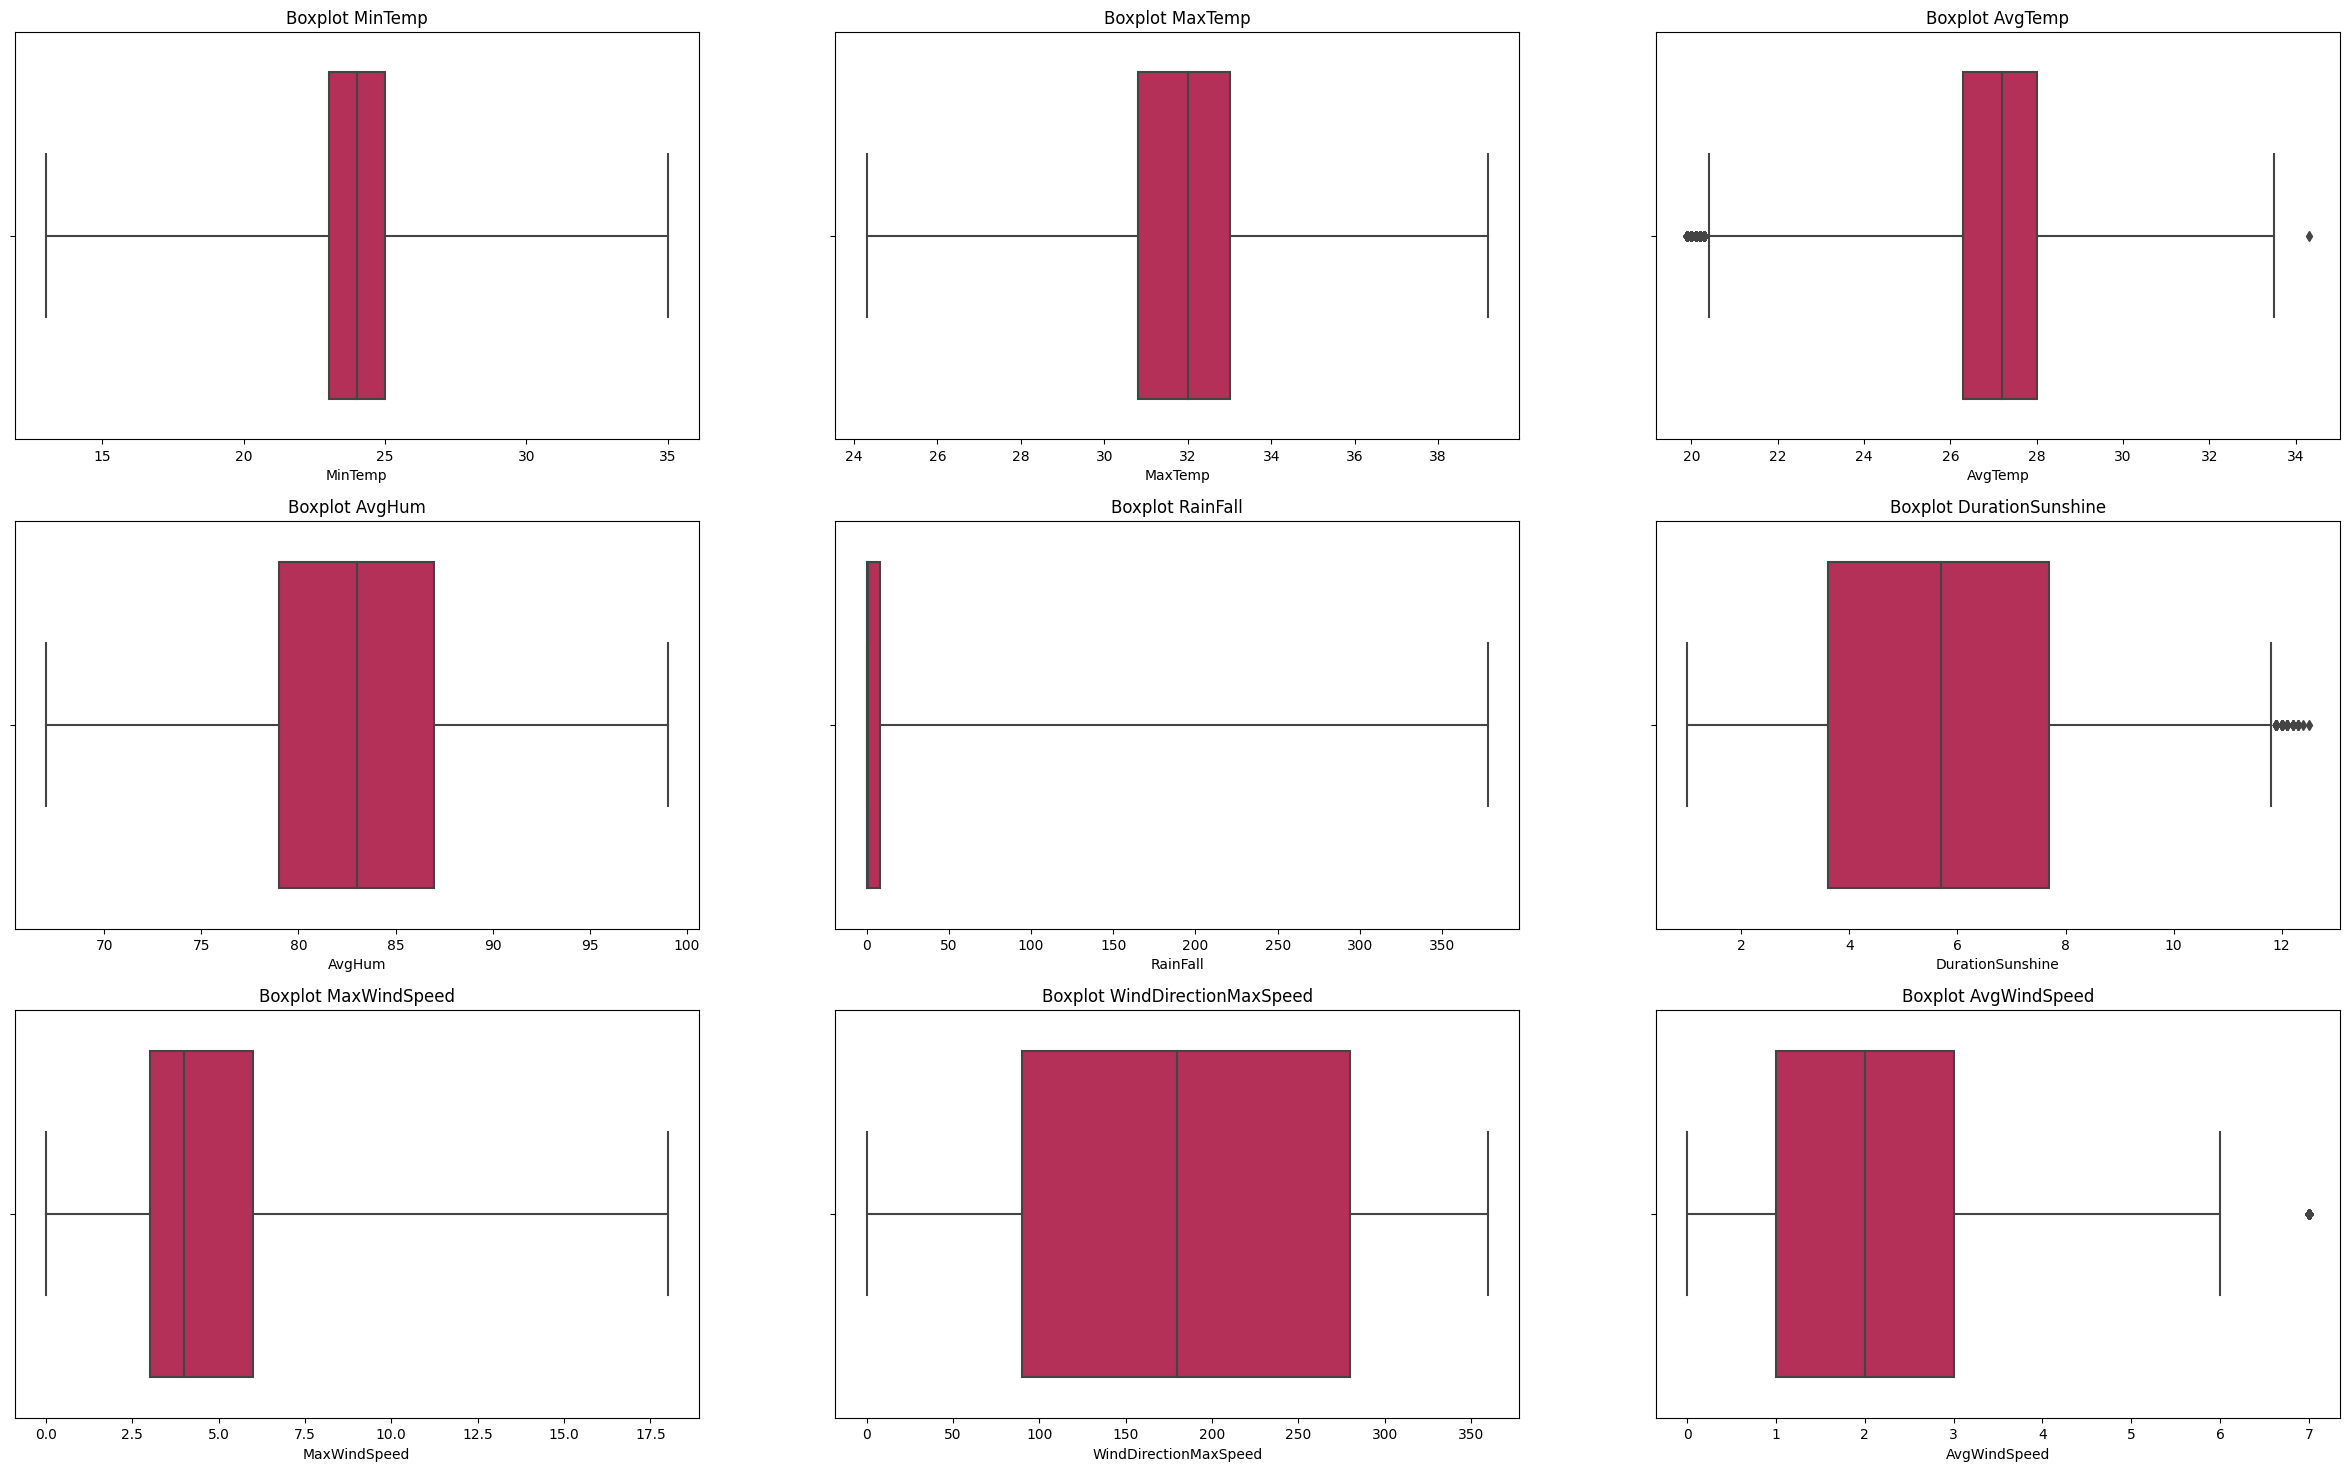

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan DataFrame dan kolom yang akan digunakan
climate_data_box_plot = climate_data[['MinTemp', 'MaxTemp', 'AvgTemp', 'AvgHum', 'RainFall', 'DurationSunshine', 'MaxWindSpeed', 'WindDirectionMaxSpeed', 'AvgWindSpeed']]

# Setel ukuran dan layout subplot
i = 1
plt.figure(figsize=(30, 18))

# Loop melalui setiap kolom untuk membuat box plot dengan custom whis
whis_dict = {'DurationSunshine': 1, 'MinTemp': 5, 'MaxTemp': 3, 'AvgTemp': 3.5, 'RainFall': 65, 'MaxWindSpeed': 4, 'AvgHum': 1.5, 'WindDirectionMaxSpeed': 0.5}

for feature in climate_data_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=climate_data_box_plot[feature], palette="rocket_r", whis=whis_dict.get(feature, 1.5))
    plt.title(f'Boxplot {feature}')
    i += 1

# Tampilkan plot
plt.show()

In [ ]:
# Replace WindDirectionMaxSpeed Value
climate_data["WindDirectionMaxSpeed"] = climate_data["WindDirectionMaxSpeed"].apply(lambda x: 0 if pd.isnull(x) else
                        1 if x == 0 else
                        2 if 0 < x < 90 else
                        3 if x == 90 else
                        4 if 90 < x < 180 else
                        5 if x == 180 else
                        6 if 180 < x < 270 else
                        7 if x == 270 else
                        8 if 270 < x < 360 else
                        9 if x == 360 else x)

In [ ]:
# Fillna Missing Value Numeric (median) Kategorik (mode)
def fill_missing_values(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Menggantikan nilai yang hilang dengan median untuk kolom numerik
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Menggantikan nilai yang hilang dengan mode untuk kolom kategori
            df[col].fillna(df[col].mode()[0], inplace=True)

fill_missing_values(climate_data)

In [ ]:
climate_data.isnull().mean()

Date                     0.0
MinTemp                  0.0
MaxTemp                  0.0
AvgTemp                  0.0
AvgHum                   0.0
RainFall                 0.0
DurationSunshine         0.0
MaxWindSpeed             0.0
WindDirectionMaxSpeed    0.0
AvgWindSpeed             0.0
MostWindDirection        0.0
station_id               0.0
date_day                 0.0
date_month               0.0
date_year                0.0
dtype: float64

In [ ]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307584 entries, 811 to 589264
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   307584 non-null  object 
 1   MinTemp                307584 non-null  float64
 2   MaxTemp                307584 non-null  float64
 3   AvgTemp                307584 non-null  float64
 4   AvgHum                 307584 non-null  float64
 5   RainFall               307584 non-null  float64
 6   DurationSunshine       307584 non-null  float64
 7   MaxWindSpeed           307584 non-null  float64
 8   WindDirectionMaxSpeed  307584 non-null  int64  
 9   AvgWindSpeed           307584 non-null  float64
 10  MostWindDirection      307584 non-null  object 
 11  station_id             307584 non-null  int64  
 12  date_day               307584 non-null  float32
 13  date_month             307584 non-null  float32
 14  date_year              307584 non-

In [ ]:
climate_data.describe()

,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,station_id,date_day,date_month,date_year
count,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000,307584.000000
mean,23.519611,31.706306,26.986879,82.685897,7.792137,5.633078,4.760498,5.226068,1.926813,96823.882650,15.716084,6.508476,2014.776123
std,1.944135,1.834687,1.663144,5.986792,16.304249,2.493826,2.108327,2.328648,1.190086,522.180535,8.793138,3.446332,3.372036
min,13.000000,24.300000,19.900000,67.000000,0.000000,1.000000,0.000000,1.000000,0.000000,96001.000000,1.000000,1.000000,2010.000000
25%,23.000000,30.800000,26.300000,79.000000,0.000000,3.600000,3.000000,3.000000,1.000000,96295.000000,8.000000,4.000000,2012.000000
50%,24.000000,32.000000,27.200000,83.000000,0.700000,5.700000,4.000000,5.000000,2.000000,96791.000000,16.000000,6.000000,2015.000000
75%,25.000000,33.000000,28.000000,87.000000,8.000000,7.700000,6.000000,8.000000,3.000000,97230.000000,23.000000,10.000000,2018.000000
max,35.000000,39.200000,34.300000,99.000000,378.000000,12.500000,18.000000,9.000000,7.000000,97980.000000,31.000000,12.000000,2020.000000


Berdasarkan BMKG untuk **WindSpeed** baik Max maupun Avg memiliki nilai minimum berkisar 0-45 knots (0-23,15 m/s)

untuk **Rainfall** juga memiliki nilai minimum 0 mm karena ketika sedang tidak
ada hujan sama sekali menjadi nilai minumum untuk curah hujan yang berkisar 0 mm

Dan untuk **DurationSunshine** memiliki kurang lebih 1 jam dalam harian nya

## Encoding Value

In [ ]:
# Replace value MostWindDirection for Encode
climate_data["MostWindDirection"].replace([
    "C ","N ", "NE", "E ", "SE", "S ", "SW", "W ", "NW"],
     [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True
                                             )

In [ ]:
climate_data

,Date,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,MostWindDirection,station_id,date_day,date_month,date_year
811,23/03/2012,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,1,96001,23.0,3.0,2012.0
1215,05/01/2013,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,6,96001,1.0,5.0,2013.0
1216,05/02/2013,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,5,96001,2.0,5.0,2013.0
1217,05/03/2013,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,6,96001,3.0,5.0,2013.0
1218,05/04/2013,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,5,96001,4.0,5.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589258,25/12/2020,24.4,31.7,28.2,84.0,8.5,6.0,5.0,6,3.0,6,97980,25.0,12.0,2020.0
589259,26/12/2020,24.0,31.8,27.6,81.0,1.5,8.1,3.0,4,1.0,0,97980,26.0,12.0,2020.0
589260,27/12/2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,8,2.0,0,97980,27.0,12.0,2020.0
589263,30/12/2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,6,2.0,0,97980,30.0,12.0,2020.0


## Feature Selection

In [ ]:
climate_train = climate_data.drop(['Date', 'station_id', 'date_day', 'date_month', 'date_year'], axis=1)

# **Modelling**

## K-Means

In [ ]:
climate_train

,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,MostWindDirection
811,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,1
1215,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,6
1216,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,5
1217,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,6
1218,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,5
...,...,...,...,...,...,...,...,...,...,...
589258,24.4,31.7,28.2,84.0,8.5,6.0,5.0,6,3.0,6
589259,24.0,31.8,27.6,81.0,1.5,8.1,3.0,4,1.0,0
589260,25.2,31.2,29.2,74.0,0.0,1.4,4.0,8,2.0,0
589263,25.2,32.6,28.4,80.0,0.0,2.4,7.0,6,2.0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.datasets import make_blobs

Membuat data sample untuk mempermudah proses **Running Program** sebanyak **20,000 data**

In [ ]:
data_downsampled = climate_train.sample(n=20000)

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans
n = []
WSS = []
db = []
sil = []
K = range(2, 10)

for n in K:
    algorithm = (KMeans(n_clusters = n, n_init=10) )
    algorithm.fit(data_downsampled)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(data_downsampled,labels))
    sil.append(silhouette_score(data_downsampled, labels, metric = 'euclidean'))
    WSS.append(algorithm.inertia_)

Score model berdasarkan nilai cluster

In [ ]:
# Evaluate Model Score berdasarkan number Cluster
results_df = pd.DataFrame({
    'n_clusters': K,
    'WSS': WSS,
    'Davies-Bouldin Index': db,
    'Silhouette Score': sil
})
results_df

,n_clusters,WSS,Davies-Bouldin Index,Silhouette Score
0,2,3.115949e+06,0.644922,0.669721
1,3,2.214888e+06,0.759274,0.519795
2,4,1.792331e+06,1.063683,0.267026
3,5,1.457719e+06,1.003866,0.272115
4,6,1.300602e+06,1.032192,0.262712
5,7,1.199046e+06,1.213849,0.201317
6,8,1.115512e+06,1.211940,0.195669
7,9,1.058453e+06,1.222471,0.190375


Visualisasi Banyak nya cluster yang optimal

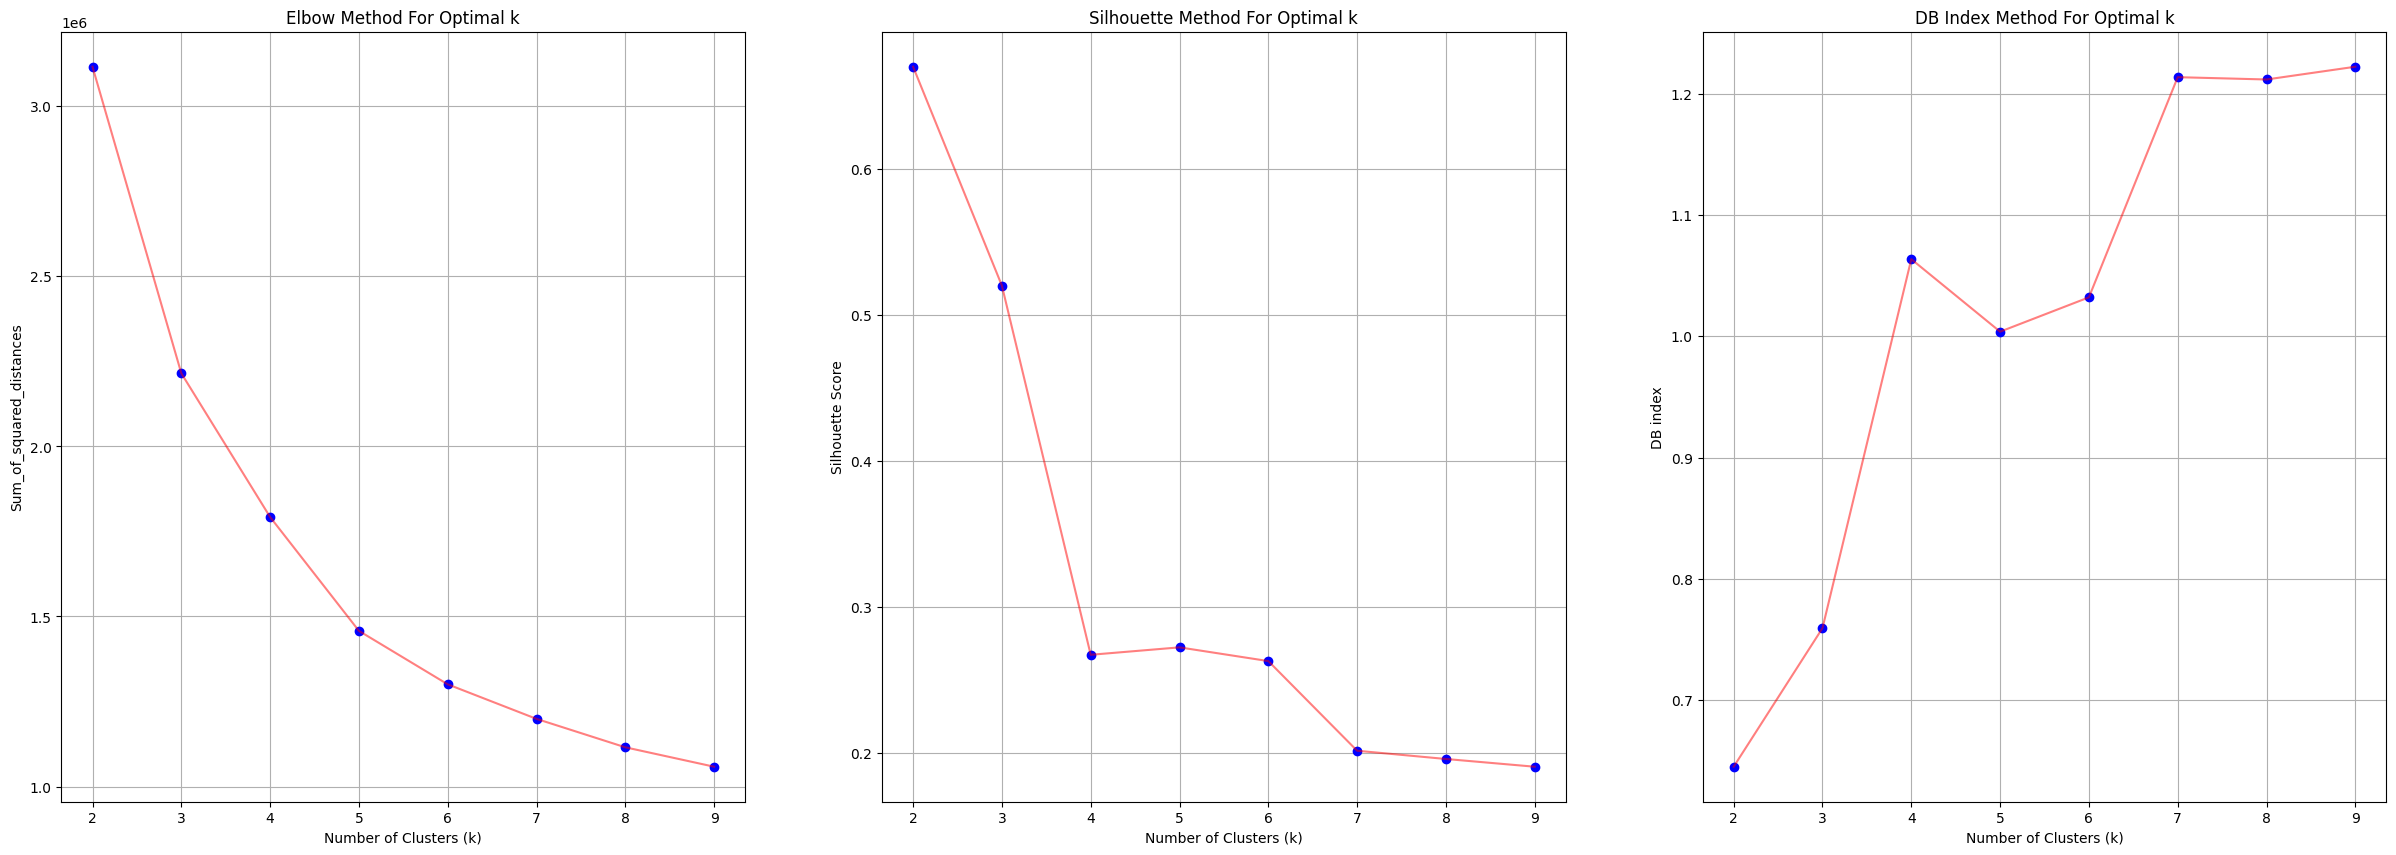

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(K, WSS, 'bo')
ax1.plot(K, WSS, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 0.5)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

ax3.plot(K,db, 'bo')
ax3.plot(K, db, 'r-', alpha = 0.5)
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('DB index')
ax3.set_title('DB Index Method For Optimal k')
ax3.grid(True)

Dapat disimpulkan bahwa Cluster dengan jumlah **3 cluster** adalah yang optimal dibandingkan dengan yang lain

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
climate_train['Cluster'] = kmeans.fit_predict(climate_train)

In [ ]:
climate_train

,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,MostWindDirection,Cluster
811,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,1,0
1215,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,6,0
1216,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,5,1
1217,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,6,0
1218,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
589258,24.4,31.7,28.2,84.0,8.5,6.0,5.0,6,3.0,6,0
589259,24.0,31.8,27.6,81.0,1.5,8.1,3.0,4,1.0,0,0
589260,25.2,31.2,29.2,74.0,0.0,1.4,4.0,8,2.0,0,0
589263,25.2,32.6,28.4,80.0,0.0,2.4,7.0,6,2.0,0,0


In [ ]:
feature_names = climate_train.columns[~climate_train.columns.isin(['Cluster'])]

centroid_values = kmeans.cluster_centers_

centroid_df = pd.DataFrame(centroid_values, columns=feature_names)
centroid_df.index.name = 'Cluster'

print("Centroid Values:")
centroid_df.T

Centroid Values:


Cluster,0,1,2
MinTemp,23.588155,23.223649,23.032201
MaxTemp,31.826497,31.155368,30.997985
AvgTemp,27.107995,26.428375,26.288341
AvgHum,81.865179,86.507491,87.250053
RainFall,2.012336,26.869062,75.803250
DurationSunshine,5.845377,4.609563,4.612513
MaxWindSpeed,4.816898,4.489766,4.483963
WindDirectionMaxSpeed,5.169071,5.498986,5.508652
AvgWindSpeed,1.984603,1.647312,1.653091
MostWindDirection,3.233223,3.052623,3.023106


Berdasarkan centroid pada setiap cluster nya maka dapat disimpulkan bahwa ada 3 pola karateristik cuaca yang terjadi di beberapa wilayah Indonesia

1. **Pada cluster 0 (cluster 1)**, memiliki karakteristik cuaca dengan temperatur (suhu) minumum yang cukup rendah, temperatur maksimum, temperatur rata-rata suhu paling tinggi diantara cluster lainnya. serta Curah hujan dan kelembapan rata-rata yang paling rendah dari cluster lainnya dengan kecepatan angin yang tinggi . ini merupakan cluster cuaca yang terjadi pada **musim panas (kemarau)**.

2. **Pada cluster 1 (cluster 2)**, memiliki karakteristik cuaca dengan temperatur (suhu) minimum, temperatur maksimum, temperatur rata-rata cukup rendah dibandingkan dengan cluster lainnya. Selain itu cluster ini
memilki kelembapan rata-rata udara cukup tinggi, serta curah hujan dan kecepatan angin yang rendah . Cluster cuaca ini merupakan cluster cuaca **musim hujan biasa**.

3. **Pada cluster 2 (cluster 3)**, memiliki karakteristik cuaca dengan
temperatur (suhu) minumum , temperatur maksimum, temperatur rata-rata suhu paling rendah diantara cluster lainnya. Selain itu cluster ini memiliki kelembapan rata-rata udara paling tinggi, serta curah hujan paling tinggi dan kecepatan angin yang cukup tinggi. Sehingga dapat disimpulkan cluster ini merupakan cluster yang terjadi pada **musim hujan yang lebat atau ekstrem**.

In [ ]:

cluster_means = climate_train.groupby('Cluster').mean()
overall_means = climate_train[feature_names].mean()
feature_importance = np.abs(cluster_means - overall_means).mean()

# feature importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance_sorted)

Feature Importance:
RainFall                 30.944399
AvgHum                    3.068474
DurationSunshine          0.752103
MaxTemp                   0.459773
AvgTemp                   0.459397
MinTemp                   0.284122
WindDirectionMaxSpeed     0.204194
AvgWindSpeed              0.203653
MaxWindSpeed              0.201564
MostWindDirection         0.119232
dtype: float64


Berdasarkan feature importance terlihat bahwa **Rainfall** dan **AvgHum** menyebabkan terbentuknya cluster pada pola Karateristik Cuaca. Maka kedua variabel ini akan digunakan untuk visualisasi cluster

Membuat kembali sampel dari data yang sudah di clusterkan berdasarkan number of cluster optimalnya dengan **20,000 data**. Untuk mempermudah visualisasi dan kelancaran program

In [ ]:
data_downsampled = climate_train.sample(n=20000)
data_downsampled['Cluster'] = kmeans.fit_predict(data_downsampled)

# Membuat scatter plot menggunakan Plotly
scatter = go.Scatter(
    x=data_downsampled['RainFall'],
    y=data_downsampled['AvgHum'],
    mode='markers',
    marker=dict(color=data_downsampled['Cluster'], colorscale='Viridis', size=7),
    text=data_downsampled['Cluster'].astype(str),
)

layout = go.Layout(
    title='Scatter Plot berdasarkan Klaster (Downsampled)',
    xaxis=dict(title='RainFall(mm)'),
    yaxis=dict(title='AvgHum(%)'),
)

fig = go.Figure(data=[scatter], layout=layout)

fig.show()

In [ ]:
cluster_distribution = climate_train['Cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']

fig = px.bar(cluster_distribution, x='Cluster', y='Count', title='Cluster Distribution',
             labels={'Cluster': 'Cluster', 'Count': 'Count'},
             color='Cluster')

fig.show()

In [ ]:
results_df.loc[results_df['n_clusters'] == 3]

,n_clusters,WSS,Davies-Bouldin Index,Silhouette Score
1,3,2.214888e+06,0.759274,0.519795


Dari Model menggunakan K-means didapatkan model evaluasi untuk

**Davies-Bouldin Index**	sebesar **0.759274**	dan **Silhouette Score** sebesar **0.519795**. Dengan


1.   **Davies-Bouldin Index**	adalah perhitungan rasio dari jarak antara pusat klaster (intra-klaster distance) dengan jarak terdekat ke klaster lain (inter-klaster distance) untuk setiap klaster.
2.   **Silhouette Score** adalah perhitungan rasio dari jarak rata-rata ke sampel lain dalam klaster yang sama (intra-klaster distance) dibandingkan dengan jarak rata-rata ke sampel dalam klaster terdekat lainnya (inter-klaster distance)



In [ ]:
climate_train

,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,MostWindDirection,Cluster
811,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,1,0
1215,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,6,0
1216,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,5,1
1217,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,6,0
1218,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
589258,24.4,31.7,28.2,84.0,8.5,6.0,5.0,6,3.0,6,0
589259,24.0,31.8,27.6,81.0,1.5,8.1,3.0,4,1.0,0,0
589260,25.2,31.2,29.2,74.0,0.0,1.4,4.0,8,2.0,0,0
589263,25.2,32.6,28.4,80.0,0.0,2.4,7.0,6,2.0,0,0


In [ ]:
climate_data['Cluster'] = climate_train['Cluster']

In [ ]:
climate_data

,Date,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,MostWindDirection,station_id,date_day,date_month,date_year,Cluster
811,23/03/2012,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,1,96001,23.0,3.0,2012.0,0
1215,05/01/2013,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,6,96001,1.0,5.0,2013.0,0
1216,05/02/2013,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,5,96001,2.0,5.0,2013.0,1
1217,05/03/2013,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,6,96001,3.0,5.0,2013.0,0
1218,05/04/2013,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,5,96001,4.0,5.0,2013.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589258,25/12/2020,24.4,31.7,28.2,84.0,8.5,6.0,5.0,6,3.0,6,97980,25.0,12.0,2020.0,0
589259,26/12/2020,24.0,31.8,27.6,81.0,1.5,8.1,3.0,4,1.0,0,97980,26.0,12.0,2020.0,0
589260,27/12/2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,8,2.0,0,97980,27.0,12.0,2020.0,0
589263,30/12/2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,6,2.0,0,97980,30.0,12.0,2020.0,0


In [ ]:
climate_merge_cluster = pd.merge(climate_data, station_detail, on='station_id')

# Gabungan data climate ke stasiun dan province berdasarkan id nya
climate_merge_cluster  = pd.merge(climate_merge_cluster, province_detail, left_on='province_id', right_on='province_id')
climate_merge_cluster

,Date,MinTemp,MaxTemp,AvgTemp,AvgHum,RainFall,DurationSunshine,MaxWindSpeed,WindDirectionMaxSpeed,AvgWindSpeed,...,date_month,date_year,Cluster,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,23/03/2012,18.0,31.4,26.0,90.0,0.0,1.1,3.0,9,3.0,...,3.0,2012.0,0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,05/01/2013,20.0,33.6,29.0,87.0,0.0,8.0,4.0,6,4.0,...,5.0,2013.0,0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,05/02/2013,19.0,32.8,27.8,90.0,14.8,7.0,8.0,6,6.0,...,5.0,2013.0,1,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,05/03/2013,20.0,31.4,26.5,94.0,0.5,3.0,4.0,6,3.0,...,5.0,2013.0,0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,05/04/2013,19.0,31.6,27.9,90.0,9.6,5.0,3.0,4,3.0,...,5.0,2013.0,0,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307579,26/12/2020,25.4,32.4,28.5,84.0,1.3,9.0,4.0,8,1.0,...,12.0,2020.0,0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
307580,27/12/2020,25.2,31.8,28.1,85.0,0.0,8.2,4.0,8,2.0,...,12.0,2020.0,0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
307581,28/12/2020,26.0,32.0,28.3,86.0,0.0,1.7,4.0,7,1.0,...,12.0,2020.0,0,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku
307582,29/12/2020,25.7,31.0,27.5,88.0,20.0,4.6,6.0,8,2.0,...,12.0,2020.0,1,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku


In [ ]:
climate_merge_cluster.to_csv('climate_merge_cluster.csv', index=False)